# CODIGO


#### DURANTE ESTE CODIGO IREMOS PASO A PASO PARA VER COMO SE DEBEN TRATAR LOS DATOS, VISUALIZARLOS, RELACIONARLOS Y VER COMO LAS VARIABLES PREDICTORAS SE COMPORTAN EN VARIOS MODELOS Y COMO ES SU RENDIMIENTO. ESTE CODIGO TAMBIÉN CONTIENE CIERTAS EXPLICACIONES PERTINENTES PARA ENTENDER QUE Y COMO SE ESTÁN HACIENDO LAS COSAS. CUALQUIER APORTE ES BIENVENIDO.

In [1]:
import pandas as pd

# Lee el archivo Excel
data = pd.read_excel('Obesity_Dataset.xlsx')  # sheet_name puede omitirse para la primera hoja

# Muestra las primeras filas del DataFrame
data.head()


,Sex,Age,Height,Overweight_Obese_Family,Consumption_of_Fast_Food,Frequency_of_Consuming_Vegetables,Number_of_Main_Meals_Daily,Food_Intake_Between_Meals,Smoking,Liquid_Intake_Daily,Calculation_of_Calorie_Intake,Physical_Excercise,Schedule_Dedicated_to_Technology,Type_of_Transportation_Used,Class
0,2,18,155,2,2,3,1,3,2,1,2,3,3,4,2
1,2,18,158,2,2,3,1,1,2,1,2,1,3,3,2
2,2,18,159,2,2,2,1,3,2,3,2,2,3,4,2
3,2,18,162,2,2,2,2,2,2,2,2,1,3,4,2
4,2,18,165,2,1,2,1,3,2,1,2,3,3,2,2


##### VAMOS A VER LA ESTRUCTURA DE LOS DATOS, VER CUANTAS VARIABLES TENEMOS, LOS MISSING VALUES QUE HAY Y EL TIPO DE DATO QUE ES CONTENIDO EN CADA COLUMNA

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Sex                                1610 non-null   int64
 1   Age                                1610 non-null   int64
 2   Height                             1610 non-null   int64
 3   Overweight_Obese_Family            1610 non-null   int64
 4   Consumption_of_Fast_Food           1610 non-null   int64
 5   Frequency_of_Consuming_Vegetables  1610 non-null   int64
 6   Number_of_Main_Meals_Daily         1610 non-null   int64
 7   Food_Intake_Between_Meals          1610 non-null   int64
 8   Smoking                            1610 non-null   int64
 9   Liquid_Intake_Daily                1610 non-null   int64
 10  Calculation_of_Calorie_Intake      1610 non-null   int64
 11  Physical_Excercise                 1610 non-null   int64
 12  Schedule_Dedicated_t

## VARIABLES Y QUE TIENE CADA UNA:

Sex: Male / Female 

Age 

Height Values in integers (cm)

Overweight/Obese Families: Yes / No 

Consumption of Fast Food: Yes / No 

Frequency of Consuming Vegetables: Rarely / Sometimes / Always 

Number of Main Meals Daily 1: 1-2 / 3 / 3+ 

Food Intake Between Meals: Rarely / Sometimes / Usually / Always 

Smoking: Yes / No 

Liquid Intake Daily: amount smaller than one liter / Within the range of 1 to 2 liters / In excess of 2 liters 

Calculation Of Calorie Intake: Yes / No 

Physical Exercise: No physical activity / In the range of 1-2 days / In the range of 3-4 days / In the range of 5-6 days / 6+ days

Schedule Dedicated to Technology: Between 0 and 2 hours / Between 3 and 5 hours / Exceeding five hours 

Type of Transportation Used: Automobile / Motorbike / Bike / Public transportation / Walking 

Class: Underweight / Normal / Overweight / Obesity 

##### AUNQUE ARRIBA PONGA QUE TODOS SON INT64, DESDE KAGGLE COMPROBÉ QUE, EXCEPTO AGE AND HEIGHT, TODAS SON CATEGORICAS. SI QUISIERAMOS SIMPLEMENTE CONSTRUIR UN MODELO Y EVALUARLO LO DEJARIAMOS ASI Y YA, PERO QUEREMOS VER TAMBIÉN UN POCO DE ANÁLISIS DESCRIPTIVO Y VISUALIZACIÓN, POR LO QUE TENEMOS QUE CONVERTIRLAS A FACTOR. NO OBSTANTE, LUEGO DEBEREMOS CAMBIARLAS DE NUEVO A LA HORA DE CONSTRUIR Y EVALUAR LOS MODELOS.

In [3]:
data["Overweight_Obese_Family"] = data["Overweight_Obese_Family"].astype("category")
data["Consumption_of_Fast_Food"] = data["Consumption_of_Fast_Food"].astype("category")
data["Frequency_of_Consuming_Vegetables"] = data["Frequency_of_Consuming_Vegetables"].astype("category")
data["Sex"] = data["Sex"].astype("category")
data["Number_of_Main_Meals_Daily"] = data["Number_of_Main_Meals_Daily"].astype("category")
data["Food_Intake_Between_Meals"] = data["Food_Intake_Between_Meals"].astype("category")
data["Liquid_Intake_Daily"] = data["Liquid_Intake_Daily"].astype("category")
data["Calculation_of_Calorie_Intake"] = data["Calculation_of_Calorie_Intake"].astype("category")
data["Physical_Excercise"] = data["Physical_Excercise"].astype("category")
data["Schedule_Dedicated_to_Technology"] = data["Schedule_Dedicated_to_Technology"].astype("category")
data["Class"] = data["Class"].astype("category")
data["Smoking"] = data["Smoking"].astype("category")
data["Type_of_Transportation_Used"] = data["Type_of_Transportation_Used"].astype("category")

##### VOLVER A VER LA ESTRUCTURA DE NUESTROS DATOS SIEMPRE ES BUENO PARA PODER CONFIRMAR QUE LO QUE ESTAMOS HACIENDO SE EJECUTA CORRECTAMENTE. NO OBSTANTE, NO ES IMPRESCINDIBLE SI ESTAMOS TOTALMENTE SEGUROS DE LO QUE ESTAMOS HACIENDO.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1610 entries, 0 to 1609
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype   
---  ------                             --------------  -----   
 0   Sex                                1610 non-null   category
 1   Age                                1610 non-null   int64   
 2   Height                             1610 non-null   int64   
 3   Overweight_Obese_Family            1610 non-null   category
 4   Consumption_of_Fast_Food           1610 non-null   category
 5   Frequency_of_Consuming_Vegetables  1610 non-null   category
 6   Number_of_Main_Meals_Daily         1610 non-null   category
 7   Food_Intake_Between_Meals          1610 non-null   category
 8   Smoking                            1610 non-null   category
 9   Liquid_Intake_Daily                1610 non-null   category
 10  Calculation_of_Calorie_Intake      1610 non-null   category
 11  Physical_Excercise                 1610 non

## EDA 

##### EN EL ANÁLISIS EXPLORATORIO,  PODEMOS HACER VARIAS COSAS. PARA VARIABLES NUMERICAS, LA FUNCIÓN DESCRIBE ES MUY BUENA YA QUE TE HACE UN SUMMARY (COMO EN R).

In [5]:
data.describe()

,Age,Height
count,1610.000000,1610.000000
mean,33.115528,167.741615
std,9.835076,7.979873
min,18.000000,150.000000
25%,25.000000,161.000000
50%,32.000000,168.000000
75%,41.000000,174.000000
max,54.000000,193.000000


##### LUEGO, SI QUEREMOS LAS VARIABLES CATEGORICAS Y HACER UN RECUENTO EN CADA UNO DE SUS NIVELES, SOLO TENEMOS QUE COGER AQUELLAS VARIABLES QUE SEAN CATEGORICAS U OBJECTS (A VECES PYTHON LAS PONE ASI, PERO EN ESENCIA ES LO MISMO). LUEGO, CREAMOS UN DICCIONARIO QUE ALMACENE LO RECUENTOS, HACEMOS UN BUCLE ITERANDO EN CADA COLUMNA DE LAS VARIABLES CATEGORICAS Y CONTAMOS. LUEGO SOLO HAY QUE SACAR EL RESULTADO DEL DICCIONARIO

In [6]:
# Obtener columnas categóricas
categorical_cols = data.select_dtypes(include=['object', 'category']).columns
# Crear un diccionario para almacenar los recuentos
recuentos = {}

# Recuento de cada variable categórica
for col in categorical_cols:
    recuentos[col] = data[col].value_counts()

# Mostrar resultados
for col, counts in recuentos.items():
    print(f"Recuento para {col}:\n{counts}\n")

Recuento para Sex:
Sex
2    898
1    712
Name: count, dtype: int64

Recuento para Overweight_Obese_Family:
Overweight_Obese_Family
2    1344
1     266
Name: count, dtype: int64

Recuento para Consumption_of_Fast_Food:
Consumption_of_Fast_Food
2    1174
1     436
Name: count, dtype: int64

Recuento para Frequency_of_Consuming_Vegetables:
Frequency_of_Consuming_Vegetables
2    708
3    502
1    400
Name: count, dtype: int64

Recuento para Number_of_Main_Meals_Daily:
Number_of_Main_Meals_Daily
2    928
1    444
3    238
Name: count, dtype: int64

Recuento para Food_Intake_Between_Meals:
Food_Intake_Between_Meals
2    564
3    417
1    346
4    283
Name: count, dtype: int64

Recuento para Smoking:
Smoking
2    1118
1     492
Name: count, dtype: int64

Recuento para Liquid_Intake_Daily:
Liquid_Intake_Daily
3    631
2    523
1    456
Name: count, dtype: int64

Recuento para Calculation_of_Calorie_Intake:
Calculation_of_Calorie_Intake
2    1324
1     286
Name: count, dtype: int64

Recuento pa

##### ES IMPORTANTE OBSERVAR QUE HAY UN PEQUEÑO DESBALANCE EN LAS CLASES DE NUESTRA VARIABLE TARGET "CLASS" ESTO PUEDE VERSE REFLEJADO EN EL RENDIMIENTO DE LOS MODELOS.

##### PARA ENTENDER UN POCO MÁS LAS VARIABLES CATEGORICAS (MÁS CUANDO ALGUNAS TIENEN VARIOS NIVELES), PODEMOS EXTRAERLOS. ESTO SIEMPRE VIENE BIEN POR SI QUEREMOS CODIFICARLAS LUEGO O SIMPLEMENTE PARA PODER VER COMO ESTÁN BALANCEADAS LAS DIFERENTES VARIABLES. 

In [7]:
# Vamos a ver los niveles de la variables categoricas (object)

def uniqueValues(col):
    return list(data[col].unique())

for col in data.select_dtypes('category').columns:
    print(f'{col}\n{uniqueValues(col)}\n')

Sex
[2, 1]

Overweight_Obese_Family
[2, 1]

Consumption_of_Fast_Food
[2, 1]

Frequency_of_Consuming_Vegetables
[3, 2, 1]

Number_of_Main_Meals_Daily
[1, 2, 3]

Food_Intake_Between_Meals
[3, 1, 2, 4]

Smoking
[2, 1]

Liquid_Intake_Daily
[1, 3, 2]

Calculation_of_Calorie_Intake
[2, 1]

Physical_Excercise
[3, 1, 2, 4, 5]

Schedule_Dedicated_to_Technology
[3, 2, 1]

Type_of_Transportation_Used
[4, 3, 2, 5, 1]

Class
[2, 3, 4, 1]



## TRATAMIENTO DE OUTLIERS

##### ¿ES BUENO TRATAR LOS OUTLIERS TAN PRONTO? EN REALIDAD, SERÍA MÁS PROPIO PRIMERO VISUALIZAR LOS DATOS Y VER CUANTOS HAY A SIMPLE VISTA. EN FUNCIÓN A ESO, DECIDIMOS SI SON VERDADERAMENTE OUTLIERS QUE APARECEN DEBIDO A ERRORES DE MEDICIÓN O SON VALORES MUY ATIPICOS, PERO REALES.

In [8]:
# Borrar Outliers
import pandas as pd
import numpy as np

# Suponiendo que 'data' es tu DataFrame
# Definir las columnas numéricas para eliminar outliers
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calcular el IQR para las columnas numéricas
Q1 = data[numeric_columns].quantile(0.25)
Q3 = data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# Establecer un valor umbral para la detección de outliers (por ejemplo, 1.5 veces el IQR)
threshold = 1.5

# Crear una máscara para los outliers en las columnas numéricas
outlier_mask = ((data[numeric_columns] < (Q1 - threshold * IQR)) | 
                (data[numeric_columns] > (Q3 + threshold * IQR))).any(axis=1)

# Eliminar las filas con outliers del dataset
data_cleaned = data[~outlier_mask].copy()


# Imprimir el número de filas eliminadas
num_rows_removed = len(data) - len(data_cleaned)
print(f"Número de filas eliminadas debido a outliers: {num_rows_removed}")

Número de filas eliminadas debido a outliers: 0


## VISUALIZACIÓN DE DATOS

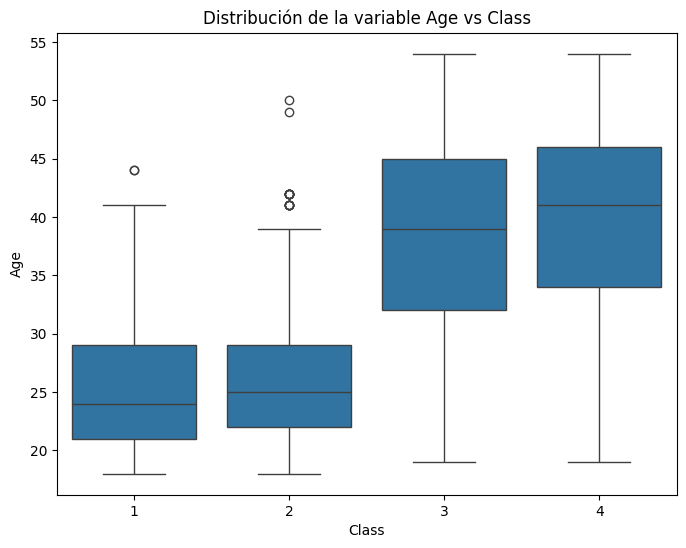

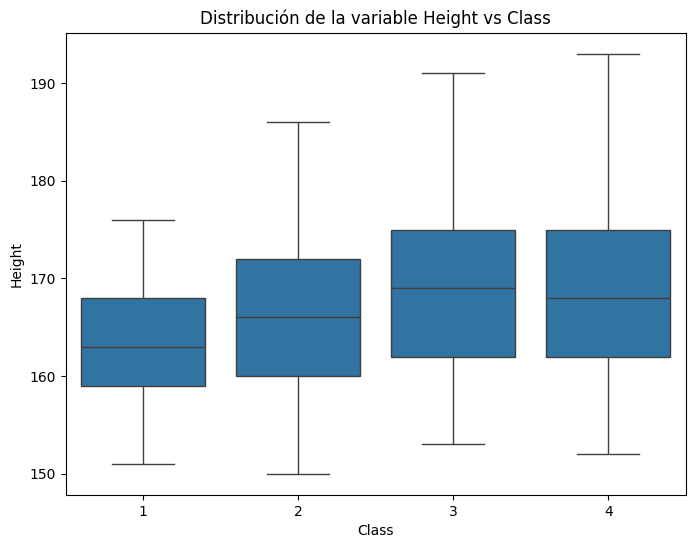

In [9]:
# Creación de Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Cogemos las variables numericas
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Iterar sobre las columnas numéricas
for var in numeric_columns:
    
    # Crear el boxplot para cada variable numérica frente a la variable 'target'
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=data["Class"], y=var, data=data)
    
    # Título dinámico
    plt.title(f"Distribución de la variable {var} vs Class")
    
    # Mostrar el gráfico
    plt.show()

##### APENAS HAY "OUTLIERS". DE HECHO, CUANDO HACEMOS EL TRATAMIENTO DE ESTOS, NO SE ELIMINÓ NINGUNO. PARECE QUE EN LA EDAD, PARA LA CLASE 2 PUDIERA HABER ALGÚN DATO MÁS FUERA DE LO COMÚN, PERO NO ES LO SUFICIENTE Y ADEMÁS NO MOLESTA EN NADA A NUESTRO DATASET.

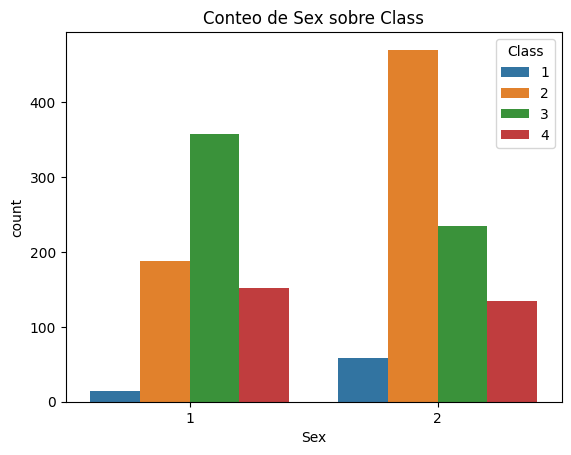

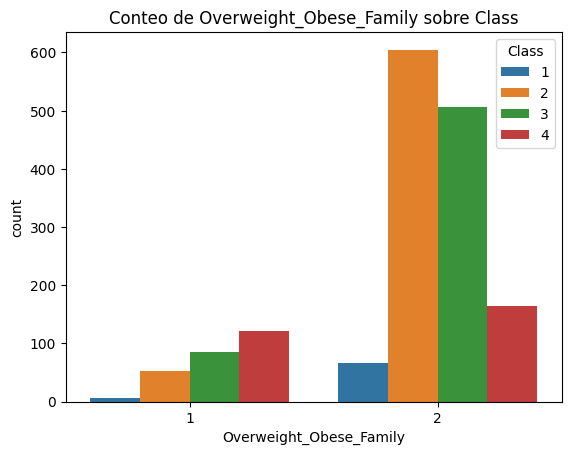

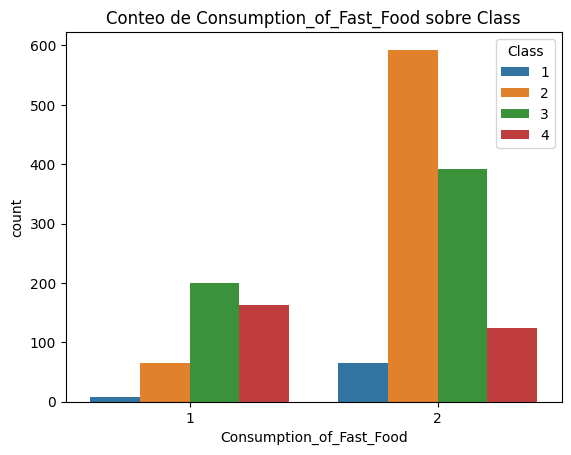

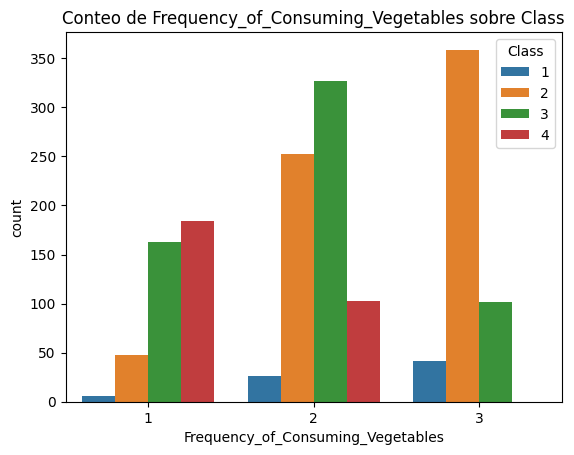

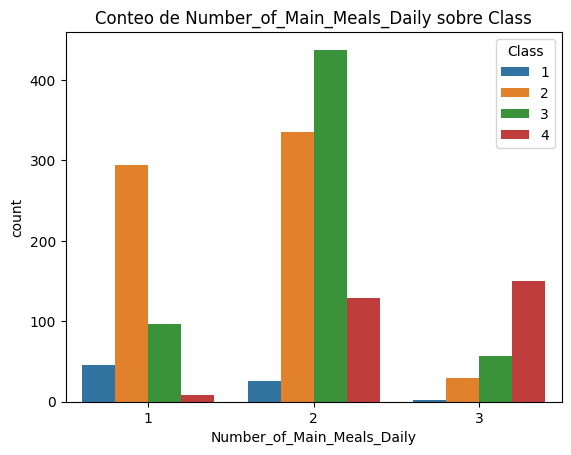

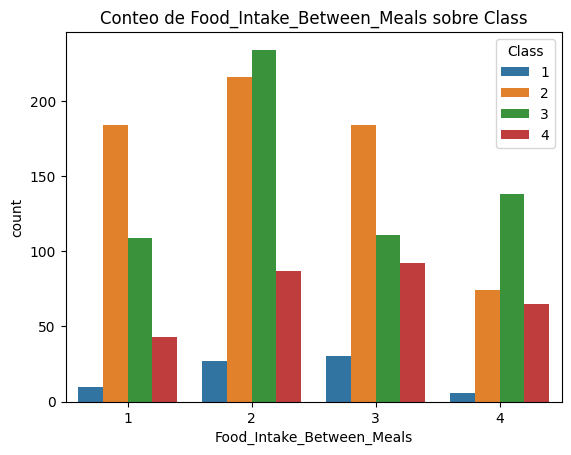

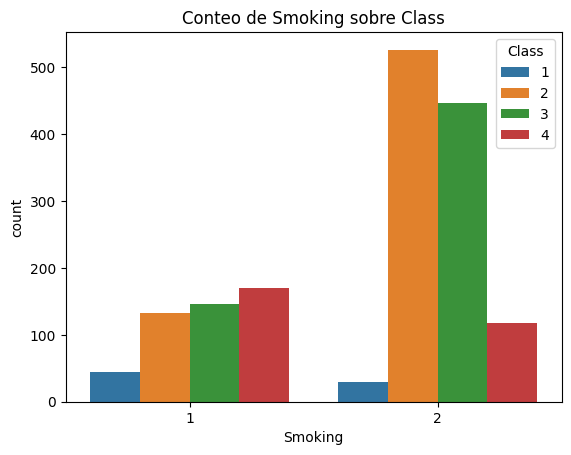

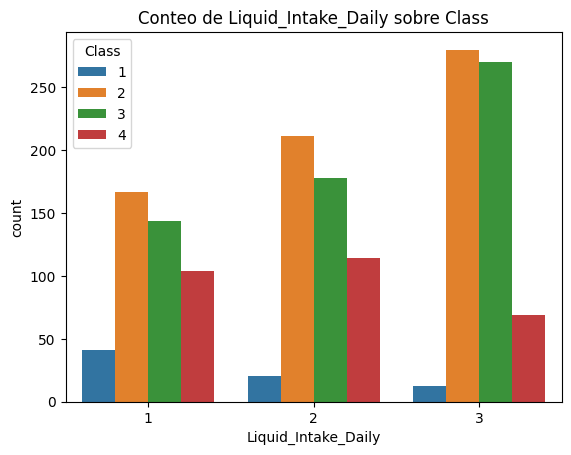

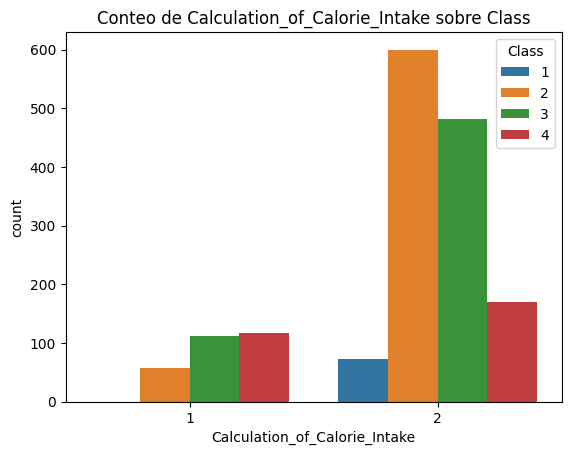

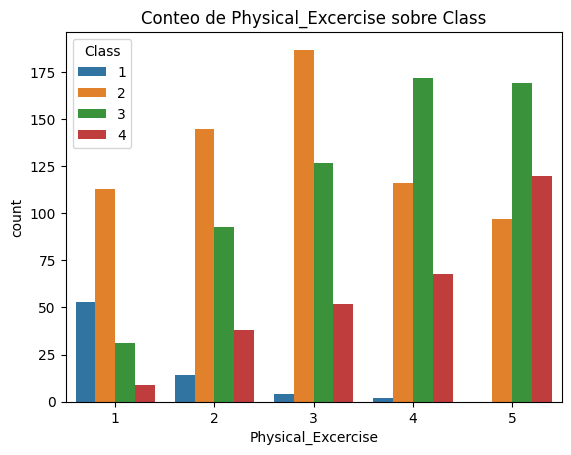

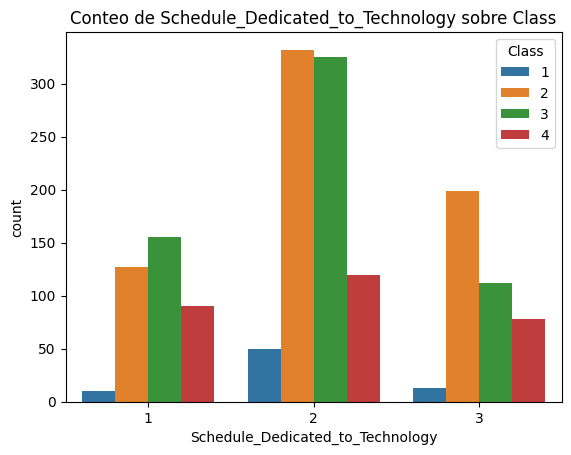

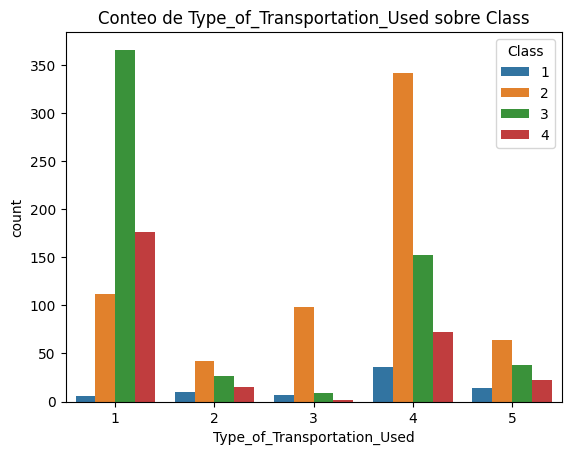

In [10]:
# Gráficos para variables categoricas
categorical_cols_plot = categorical_cols.drop('Class')
# Creamos un bucle for para iterar sobre las variables categoricas
for var in categorical_cols_plot:
    
    # Creamos el gráfico para cata iteracion
    sns.countplot(x=var, hue=data["Class"], data=data)
    
    # Ponemos un titulo
    plt.title(f"Conteo de {var} sobre Class")
    
    # Lo printamos
    plt.show()

##### COMO DIJE ANTERIORMENTE, LAS CLASES DE LA VARIABLE TARGET ESTAN UN POCO DESBALANCEADAS Y, ALGUNOS NIVELES DE LAS VARIABLES TAMBIÉN. ES POR ESO QUE PODEMOS VER ALGUNOS RESULTADOS QUE APARENTEMENTE NO SON LÓGICOS PERO POR LA PROPORCIÓN EN LA QUE ESTÁN.

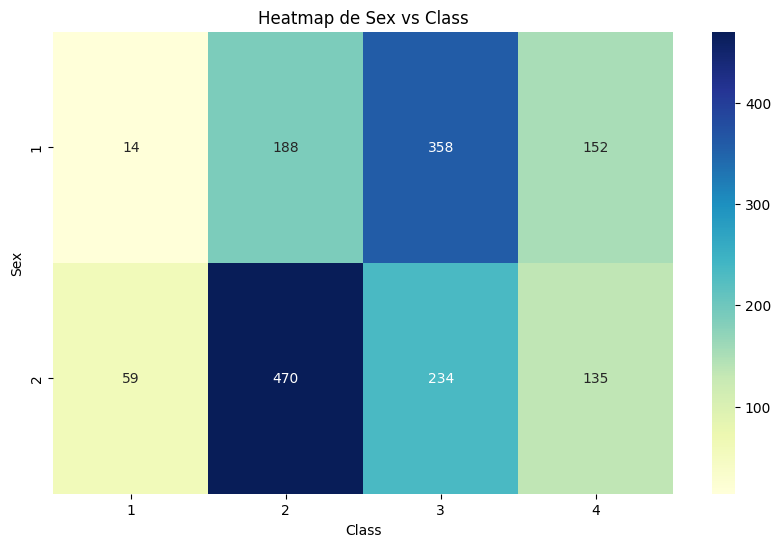

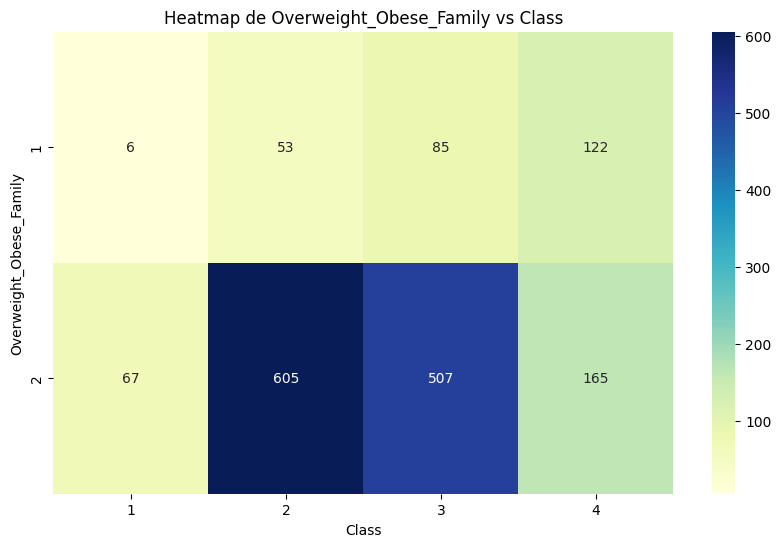

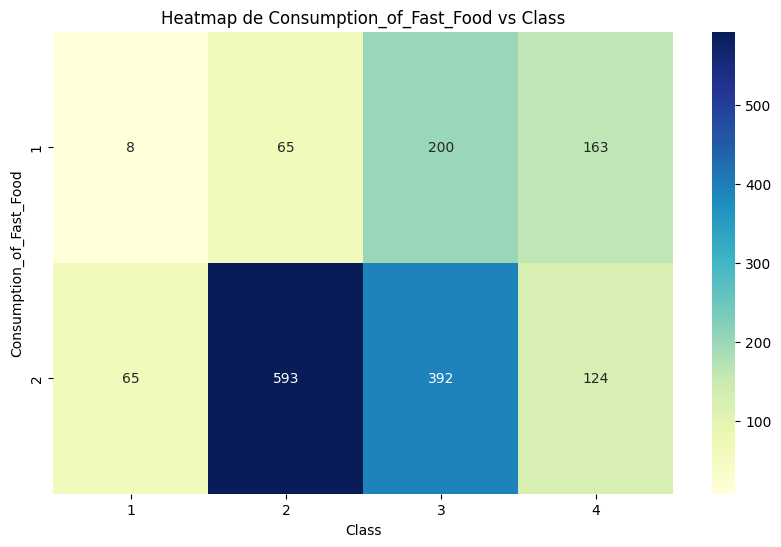

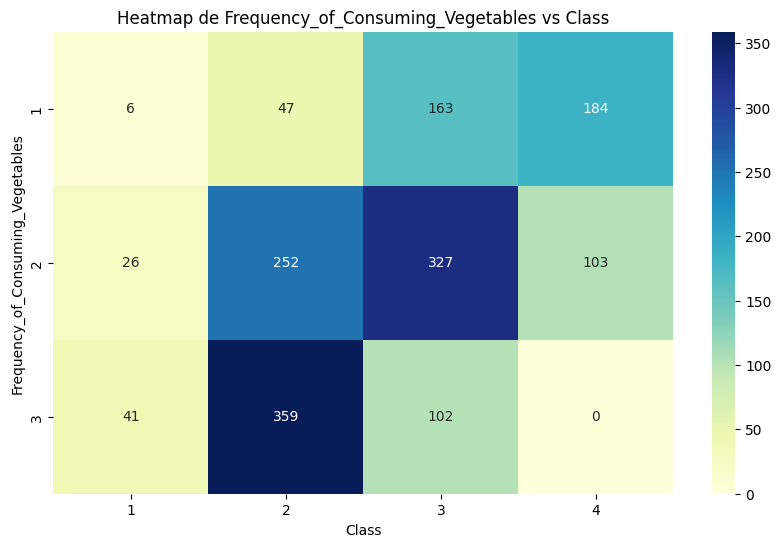

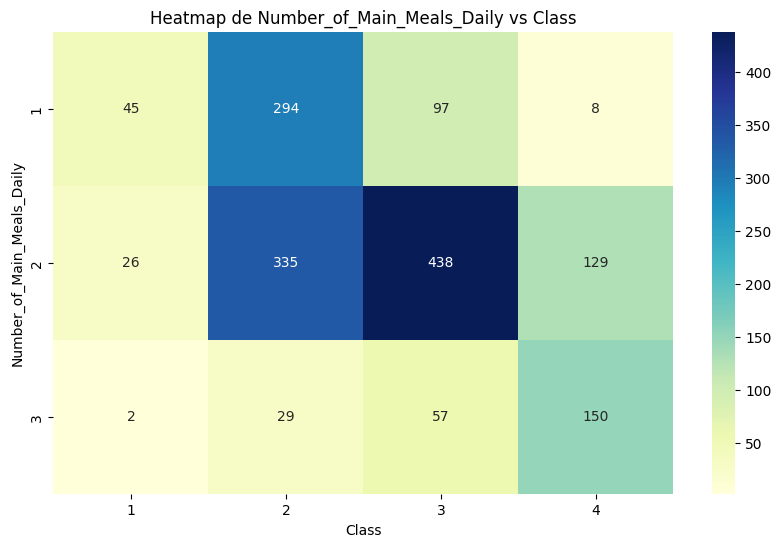

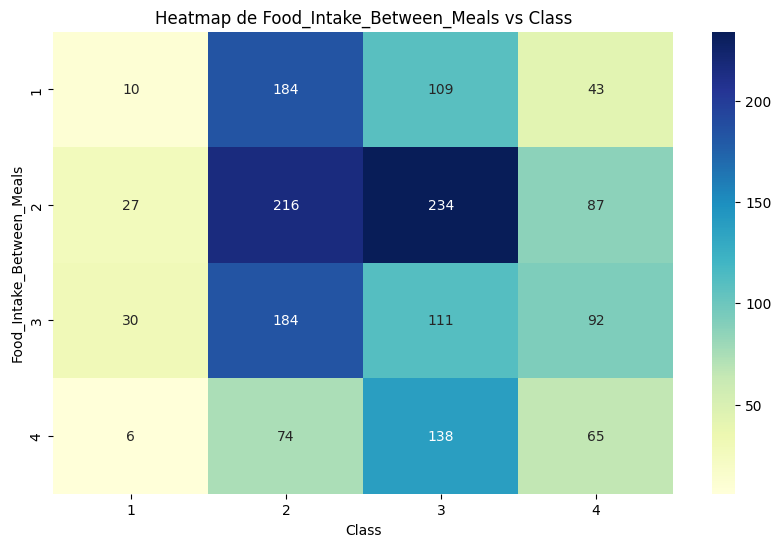

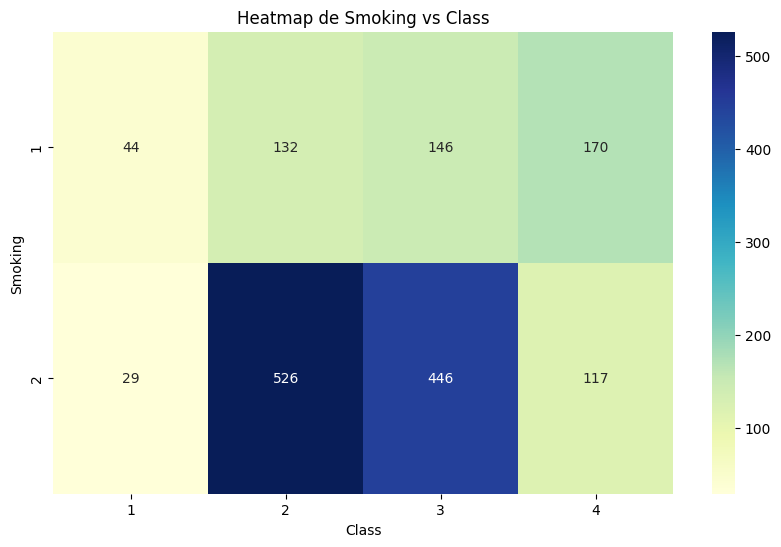

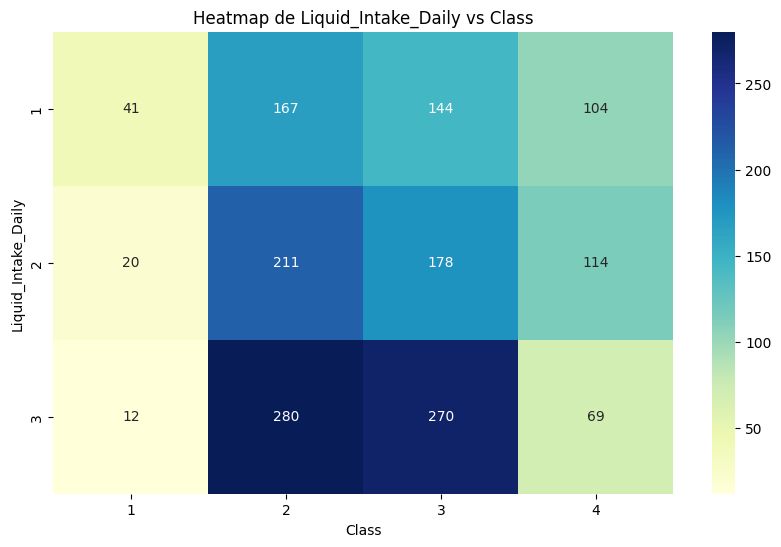

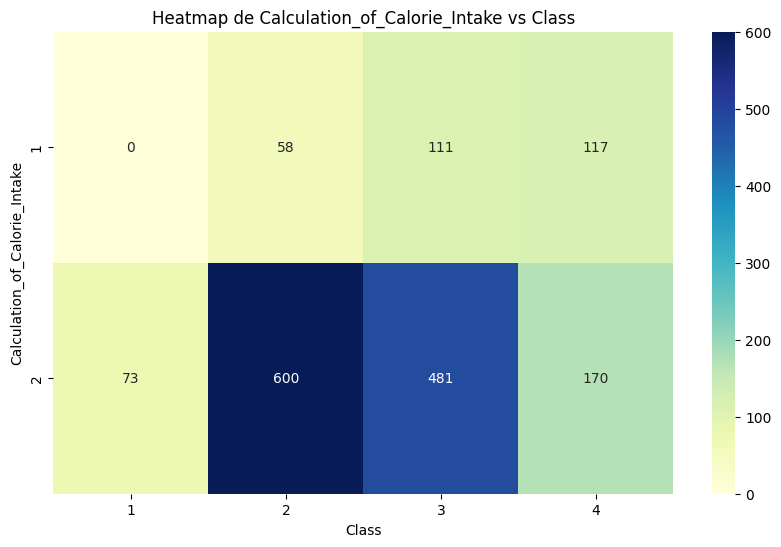

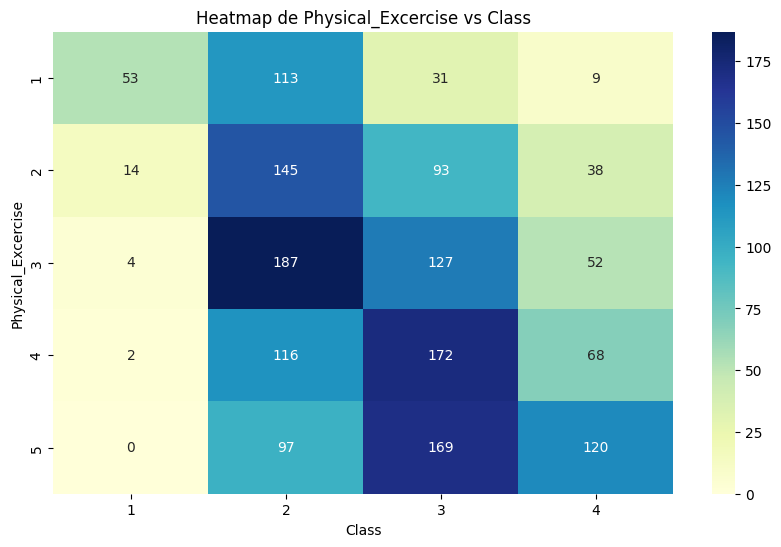

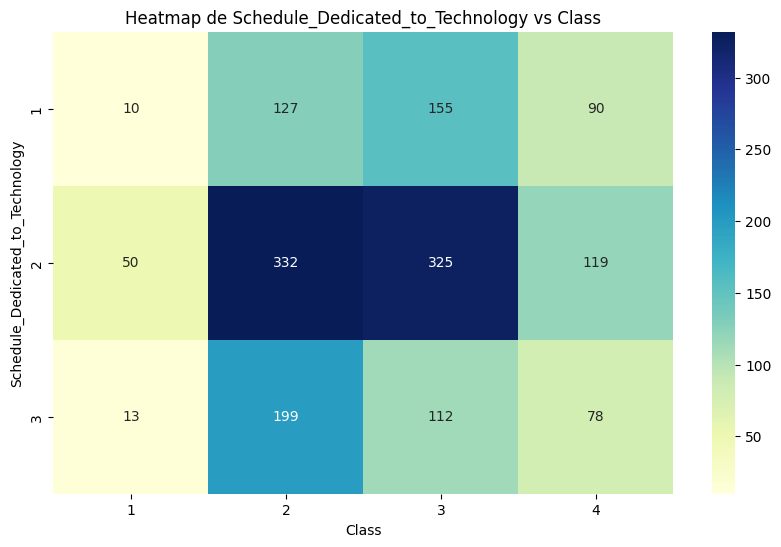

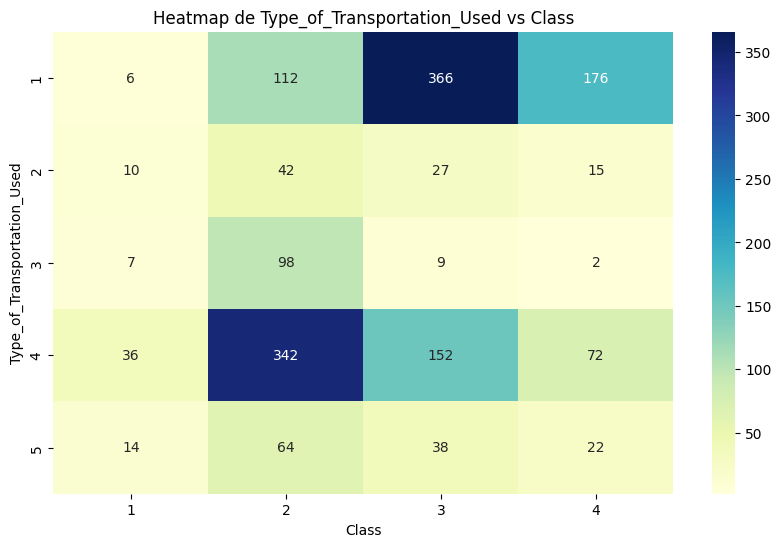

In [11]:
# Heatmap

# Creamos un bucle for para iterar sobre las variables categóricas
for var in categorical_cols_plot:
    # Crear la tabla de contingencia
    contingency_table = pd.crosstab(data[var], data["Class"])
    
    # Opcional: calcular proporciones
    # contingency_table = contingency_table.div(contingency_table.sum(axis=1), axis=0)

    # Crear el heatmap
    plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según sea necesario
    sns.heatmap(contingency_table, annot=True, fmt='g', cmap='YlGnBu', cbar=True)

    # Ponemos un título
    plt.title(f"Heatmap de {var} vs Class")
    
    # Lo imprimimos
    plt.show()

##### LOS HEATMAPS NOS VAN A AYUDAR A VER, LO QUE EN EL GRÁFICO DE BARRAS PODRÍA SER MÁS DIFICULTOSO. ES MUCHO MÁS CLARO Y ATRACTIVO. ADEMÁS, SABEMOS LOS NIVELES DE CADA VARIABLE GRACIAS A LA DESCRIPCIÓN DEL PRINCIPIO. SABIENDO ESTO, SE PUEDEN EXTRAER RESULTADOS.

##### COMO DIJE ANTES, ES IMPORTANTE VOLVER A TRANSFORMAR LAS VARIABLES A INT YA QUE ESTÁN ESCALADAS Y PARA LOS MODELOS ESTO NOS VIENE BIEN. 

In [12]:
# Los volvemos a convertir a int para los modelos

data["Overweight_Obese_Family"] = data["Overweight_Obese_Family"].astype("int64")
data["Consumption_of_Fast_Food"] = data["Consumption_of_Fast_Food"].astype("int64")
data["Frequency_of_Consuming_Vegetables"] = data["Frequency_of_Consuming_Vegetables"].astype("int64")
data["Sex"] = data["Sex"].astype("int64")
data["Number_of_Main_Meals_Daily"] = data["Number_of_Main_Meals_Daily"].astype("int64")
data["Food_Intake_Between_Meals"] = data["Food_Intake_Between_Meals"].astype("int64")
data["Liquid_Intake_Daily"] = data["Liquid_Intake_Daily"].astype("int64")
data["Calculation_of_Calorie_Intake"] = data["Calculation_of_Calorie_Intake"].astype("int64")
data["Physical_Excercise"] = data["Physical_Excercise"].astype("int64")
data["Schedule_Dedicated_to_Technology"] = data["Schedule_Dedicated_to_Technology"].astype("int64")
data["Class"] = data["Class"].astype("int64")
data["Smoking"] = data["Smoking"].astype("int64")
data["Type_of_Transportation_Used"] = data["Type_of_Transportation_Used"].astype("int64")

### PARTIMOS LOS DATOS

In [13]:
# Partimos los datos

import pandas as pd
from sklearn.model_selection import train_test_split

# Definir la variable objetivo y las características
X = data_cleaned.drop(columns=['Class'])  # Características
y = data_cleaned['Class']  # Variable objetivo

# Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Conjunto de entrenamiento: {X_train.shape[0]} filas')
print(f'Conjunto de prueba: {X_test.shape[0]} filas')

Conjunto de entrenamiento: 1288 filas
Conjunto de prueba: 322 filas


### CONSTRUIMOS LOS MODELOS Y LOS EVALUAMOS

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Crear el modelo de regresión logística
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter= 10000)

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:\n", conf_matrix)

# Precisión
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:\n", report)

c:\Users\Joseka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Matriz de Confusión:
 [[  5   8   1   1]
 [  1 116  11   4]
 [  0  19  75  24]
 [  1   3  19  34]]
Precisión: 0.7142857142857143
Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.71      0.33      0.45        15
           2       0.79      0.88      0.83       132
           3       0.71      0.64      0.67       118
           4       0.54      0.60      0.57        57

    accuracy                           0.71       322
   macro avg       0.69      0.61      0.63       322
weighted avg       0.71      0.71      0.71       322



In [15]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=5, min_samples_split=2, min_samples_leaf=1)

# Entrenar el modelo
rf_model.fit(X_train, y_train)

# Hacer predicciones
rf_y_pred = rf_model.predict(X_test)

# Evaluar el modelo
rf_conf_matrix = confusion_matrix(y_test, rf_y_pred)
print("Matriz de Confusión (Random Forest):\n", rf_conf_matrix)

rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Precisión (Random Forest):", rf_accuracy)

rf_report = classification_report(y_test, rf_y_pred)
print("Reporte de Clasificación (Random Forest):\n", rf_report)

Matriz de Confusión (Random Forest):
 [[  0  13   1   1]
 [  0 116  16   0]
 [  0  19  87  12]
 [  0   3  22  32]]
Precisión (Random Forest): 0.7298136645962733
Reporte de Clasificación (Random Forest):
               precision    recall  f1-score   support

           1       0.00      0.00      0.00        15
           2       0.77      0.88      0.82       132
           3       0.69      0.74      0.71       118
           4       0.71      0.56      0.63        57

    accuracy                           0.73       322
   macro avg       0.54      0.54      0.54       322
weighted avg       0.69      0.73      0.71       322



c:\Users\Joseka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Joseka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Joseka\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo KNN
knn_model.fit(X_train, y_train)

# Hacer predicciones con KNN
knn_y_pred = knn_model.predict(X_test)

# Evaluar el modelo KNN
knn_conf_matrix = confusion_matrix(y_test, knn_y_pred)
print("Matriz de Confusión (KNN):\n", knn_conf_matrix)

knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Precisión (KNN):", knn_accuracy)

knn_report = classification_report(y_test, knn_y_pred)
print("Reporte de Clasificación (KNN):\n", knn_report)

Matriz de Confusión (KNN):
 [[  3   9   1   2]
 [  1 110  20   1]
 [  2  27  77  12]
 [  0  10  28  19]]
Precisión (KNN): 0.6490683229813664
Reporte de Clasificación (KNN):
               precision    recall  f1-score   support

           1       0.50      0.20      0.29        15
           2       0.71      0.83      0.76       132
           3       0.61      0.65      0.63       118
           4       0.56      0.33      0.42        57

    accuracy                           0.65       322
   macro avg       0.59      0.50      0.52       322
weighted avg       0.64      0.65      0.63       322



### RESULTADOS

##### EN EL CASO DEL MODELO LOGISTICO, VEMOS QUE LA PRECISIÓN APARENTEMENTE ES ALTA, PERO NOS TENEMOS QUE FIJAR MÁS EN EL RECALL, QUE INDICA COMO DE BIEN ES CAPAZ DE PREDECIR INSTANCIAS DE CADA CLASE CORRECTAMENTE Y EL F1-SCORE, QUE ES UN BALANCE ENTRE LA PRECISIÓN Y EL RECALL

##### EN EL MODELO DE RANDOM FOREST VEMOS QUE EN GENERAL TIENE UN MEJOR RENDIMIENTO PARA PREDECIR TODAS LAS CLASES EXCEPTO LA PRIMERA.

##### EN EL MODELO DE KNN, OBSERVAMOS QUE, EN GENERAL, PRESENTA UN RENDIMIENTO GENERAL PEOR QUE LOS OTROS DOS. 

##### LO QUE PODEMOS VER, EN TODOS LOS MODELOS, ES QUE NO SE ESTÁN PREDICIENDO TODAS LAS CLASES DE LA VARIABLE TARGET DE UNA FORMA CONFIABLE. ESTO SE DEBE AL DESBALANCEO QUE HAY ENTRE LOS NIVELES DE LA VARIABLE TARGET. POR ELLO, PODRIAMOS HACER UN SOBREMUESTREO DE LO NIVELES Y VOLVER A ENTRENAR Y EVALUAR LOS MODELOS. 

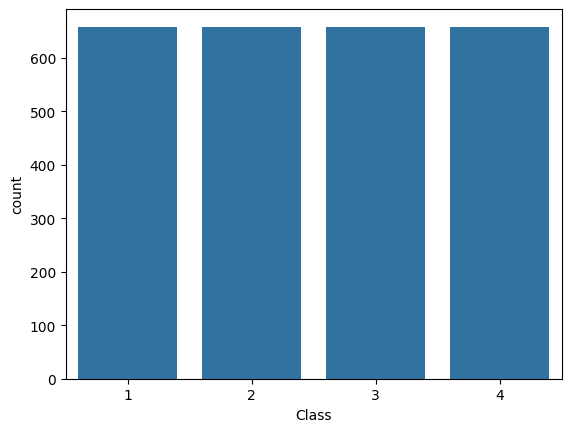

In [17]:
from imblearn import *
#Feature engineering
X = data.iloc[:,:-1]
y = data.iloc[:,[-1]]
# Balance the data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X,y)
sns.countplot(data=y_resampled, x = 'Class');

In [18]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state = 42,test_size = 0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2105, 14)
(527, 14)
(2105, 1)
(527, 1)


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Entrena el modelo Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train.values.ravel())  # `y_train` convertido a 1D si es un DataFrame

# Predice en los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Evaluación del modelo
print("Random Forest - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest - Reporte de Clasificación:\n", classification_report(y_test, y_pred_rf))

# Matriz de confusión
print("Random Forest - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest - Accuracy: 0.9146110056925996
Random Forest - Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.99      1.00      1.00       124
           2       0.87      0.92      0.90       126
           3       0.88      0.80      0.84       138
           4       0.92      0.95      0.93       139

    accuracy                           0.91       527
   macro avg       0.92      0.92      0.92       527
weighted avg       0.91      0.91      0.91       527

Random Forest - Matriz de confusión:
 [[124   0   0   0]
 [  1 116   9   0]
 [  0  16 110  12]
 [  0   1   6 132]]


In [20]:
from sklearn.linear_model import LogisticRegression

# Entrena el modelo de Regresión Logística
log_model = LogisticRegression(random_state=42, max_iter=10000)
log_model.fit(X_train, y_train.values.ravel())

# Predice en los datos de prueba
y_pred_log = log_model.predict(X_test)

# Evaluación del modelo
print("Regresión Logística - Accuracy:", accuracy_score(y_test, y_pred_log))
print("Regresión Logística - Reporte de Clasificación:\n", classification_report(y_test, y_pred_log))

# Matriz de confusión
print("Regresión Logística - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_log))


Regresión Logística - Accuracy: 0.7817836812144212
Regresión Logística - Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.91      0.91      0.91       124
           2       0.73      0.81      0.77       126
           3       0.68      0.64      0.66       138
           4       0.81      0.78      0.80       139

    accuracy                           0.78       527
   macro avg       0.78      0.79      0.78       527
weighted avg       0.78      0.78      0.78       527

Regresión Logística - Matriz de confusión:
 [[113   7   3   1]
 [  8 102  15   1]
 [  0  27  88  23]
 [  3   4  23 109]]


In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Entrena el modelo K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar `n_neighbors` según sea necesario
knn_model.fit(X_train, y_train.values.ravel())

# Predice en los datos de prueba
y_pred_knn = knn_model.predict(X_test)

# Evaluación del modelo
print("K-NN - Accuracy:", accuracy_score(y_test, y_pred_knn))
print("K-NN - Reporte de Clasificación:\n", classification_report(y_test, y_pred_knn))

# Matriz de confusión
print("K-NN - Matriz de confusión:\n", confusion_matrix(y_test, y_pred_knn))


K-NN - Accuracy: 0.7950664136622391
K-NN - Reporte de Clasificación:
               precision    recall  f1-score   support

           1       0.88      1.00      0.94       124
           2       0.78      0.76      0.77       126
           3       0.71      0.63      0.67       138
           4       0.79      0.81      0.80       139

    accuracy                           0.80       527
   macro avg       0.79      0.80      0.79       527
weighted avg       0.79      0.80      0.79       527

K-NN - Matriz de confusión:
 [[124   0   0   0]
 [ 10  96  17   3]
 [  4  21  87  26]
 [  3   6  18 112]]


### RESULTADOS POST TRATAMIENTO DE LOS NIVELES

##### PODEMOS OBSERVAR UN AUMENTO MUY SIGNIFICATIVO EN EL RENDIMIENTO DE LOS MODELOS, DONDE AHORA SI QUE SE ESTÁN PREDICIENDO DE MANERA CORRECTA LA MAYORIA DE LAS INSTANCIA DE CADA CLASE. ESTO PODEMOS OBSERVARLO SOBRETODO EN EL MODELO LOGISTICO, POR LO QUE PODRIAMOS CONCLUIR CON QUE ESTE MODELO ES EL QUE MEJOR PREDICE.

##### ESTE ESTUDIO NOS HA PERMITIDO VER LO IMPORTANTE QUE ES TENER, EN LA MEDIDA DE LO POSIBLE, BALANCEADAS LAS VARIABLES EN CUANTO A CONSTRUCCION Y EVALUACION DE MODELOS SE REFIERE. EL SOBREMUESTREO PUEDE AYUDAR MUCHO COMO HEMOS VISTO.

##### SI SE DESEA INDAGAR MÁS EN ESTE DATASET Y HACER APORTACIONES, ESTARÉ ENCANTADO DE ESCUCHARLAS!